## Initialization

In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from collections import deque
from sklearn.model_selection import train_test_split
import keras

### Data loading and prepration

In [14]:
data = pd.read_csv('.\Dataset.csv')
data.dropna(inplace=True)
X = data.drop(columns=['MPG'], inplace=False).values
y = data['MPG'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
scaler_X = MinMaxScaler().fit(X_train)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1, 1))
X_train, X_test = scaler_X.transform(X_train), scaler_X.transform(X_test)
y_train, y_test = scaler_y.transform(y_train.reshape(-1, 1)), scaler_y.transform(y_test.reshape(-1, 1))

### Modeling 

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(25, input_shape = (X_train.shape[1], ), activation = 'sigmoid'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [16]:
opt = keras.optimizers.SGD(learning_rate = 0.1, momentum=0.9)
model.compile(loss='mse', optimizer = opt, metrics = 'mse')
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6919 - mse: 0.6919 - val_loss: 0.4352 - val_mse: 0.4352
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2367 - mse: 0.2367 - val_loss: 0.1736 - val_mse: 0.1736
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0113 - mse: 0.0113 - va

9/9 [==============================] - 0s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 66/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 67/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 68/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 69/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0091 - mse: 0.0091 - val_loss

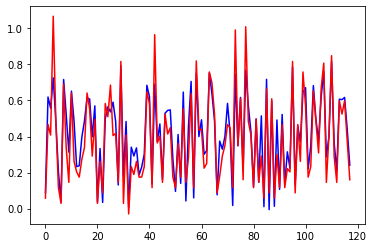

In [17]:
y_pre = model.predict(X_test)
plt.plot(y_pre, 'b')
plt.plot(y_test, 'r')